# Exercises: Data Analysis with Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

## Real Battery
A battery is connected to six different resistors, and the currents and (terminal) voltages are measured. We expect a linear relation for the voltage as a function of the current:

$V = V_0 - r I$

where $V_0$ is the source voltage and $r$ the internal resistance of the battery.

#### Measured Data
The accuracy for the voltage measurements is 0.01 V, for the current measurements 1 mA.

In [2]:
# terminal voltage in V
V = np.array([4.49, 4.47, 4.45, 4.41, 4.35, 4.28])
dV = 0.01 # accuracy in V

# current in mA
I = np.array([63, 98, 134, 199, 295, 422])
dI = 1 # accuracy in mA

#### Resistance
Calculate the resistance values for the resistors used in the measurements (with measurement errors).

In [3]:
R = V/I # resistance values
dR = (V + dV) / (I - dI) - R # error as Rmax - R = Vmax/Imin - R

for i, (a, da) in enumerate(zip(R, dR), start=1):
    print(f'resistor {i}: ({a*1000:.2f} ± {da*1000:.2f}) kΩ')

resistor 1: (71.27 ± 1.31) kΩ
resistor 2: (45.61 ± 0.57) kΩ
resistor 3: (33.21 ± 0.32) kΩ
resistor 4: (22.16 ± 0.16) kΩ
resistor 5: (14.75 ± 0.08) kΩ
resistor 6: (10.14 ± 0.05) kΩ


#### Graphical analysis
Graph the voltage vs current (with error bars) and fit a linear function. Determine the source voltage $V_0$ and the internal resistance $r$ from the fit parameters.

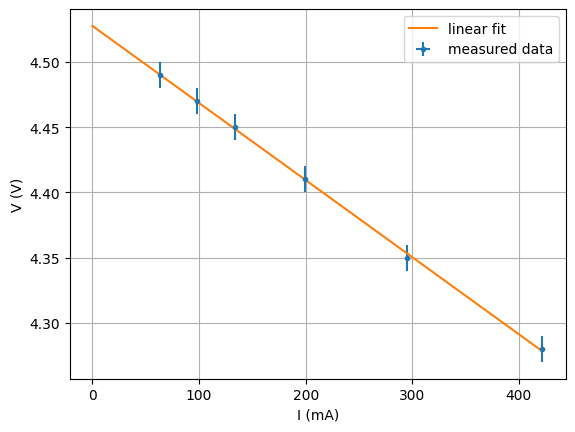

In [4]:
def linear(x, m, q):
    return m * x + q

coeff, pcov = curve_fit(linear, I, V)
m, q = coeff
r = -m # internal resistance correponds to negative slope
V0 = q # source voltage corresponds to axis intercept

dr = np.sqrt(pcov[0, 0])
dV0 = np.sqrt(pcov[1, 1])

I_range = np.linspace(0, max(I), 100) # range used to plot fit function
V_fit = linear(I_range, m, q)

plt.errorbar(I, V, xerr=dI, yerr=dV, fmt='.', label='measured data')
plt.plot(I_range, V_fit, label='linear fit')
plt.xlabel('I (mA)')
plt.ylabel('V (V)')
plt.grid()
plt.legend()
plt.show()

In [5]:
print(f'internal resistance: ({r:.5f} ± {dr:.5f}) kΩ = ({r*1000:.2f} ± {dr*1000:.2f}) Ω')
print(f'source voltage: ({V0:.3f} ± {dV0:.3f}) V')

internal resistance: (0.00059 ± 0.00001) kΩ = (0.59 ± 0.01) Ω
source voltage: (4.528 ± 0.002) V
